# Исследование объявлений о продаже квартир

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Краткий план работы:
1. *Открыть файл и изучить общую информацию*


2. *Предобработать данные*
    1. Определить и изучить пропущенные значения
        1. Предположить логичную замену 
        2. Заполнить пропуски
        3. Поиск причин появления пропуска данных
    2. Приведение данных к нужным типам
    3. Проверить дубликаты
    
    
3. *Добавление данных в таблицу*
    1. Цена квадратного метра
    2. День / месяц / год объявления
    3. Этаж квартиры
    4. Соотношение жилой и общей площади, а также отношение площади кухни к общей
    
    
4. *Выполнить исследовательский анализ данных:*
    1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков
    2. Изучить время продажи квартиры
    3. Убрать редкие и выбивающиеся значения
    4. Изучение факторов, влияющих на цену квартиры
        1. От квадратного метра
        2. Числа комнат
        3. Этаж (1 или последний)
        4. Удалённость от центра
        5. От даты размещения (дня недели, месяц и года)
    5. Выделить пункты с самой высокой и низкой стоимостью жилья
    6. Выснить, какая область входит в центр. 
    7. Выделить сегмент квартир в центре (аналогично пунктам 4.1, 4.4). Сравнить с выводами по всему городу
    
    
5. *Общий вывод*




Импортируем библиотеку Pandas и откроему наши данные.

In [1]:
import pandas as pd
estate_data = pd.read_csv('../datasets/real_estate_data.csv')
estate_data.head(12)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Произошло это по причине разделителей в формате csv. Из данных видно, что разделителем \t. Откроем данные заново, но в этот раз будем использовать параметр sep = '\t'

In [2]:
estate_data = pd.read_csv('../datasets/real_estate_data.csv', sep = '\t')
estate_data.head(12)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

У нас имеется таблица на 23699 записей со смешанными типами данных. Также, уже исходя из информации, можно увидеть множественные пропуски значений в части таблиц. Для дальнейшего преобразования нам потребуется:

* Найти пропуски и заполнить их исходя из значений
* Проверить на дупликаты и избавиться от них
* Преобразовать цифровые значения к целочисленному типу там, где это возможно.

Исходя из данных можно определить следующие столбцы, где данные могут быть целочисленные:

```
airoport_nearest, balcony, cityCenters_nearest, days_exposition, floor, floors_total, last_price, parks_around3000, parks_nearest, ponds_aroud3000, ponds_nearest, rooms, total_images
```
В остальных столбцах с численными значениями тип данных необходимо оставить *float*, так как часто там указывается размерные характеристики, требующие точности. 

Расстояния до прудов / парков можно перевести значения в *км* для придания наглядности значениям. Абсолютная точность до метра не требуется. Оптимальным вариантом будет *float* значение с допуском 2 цифр после точки. 

В столбце *first_day_exposition* помимо даты, указано время, которое для строк равно 00:00:00. Преобразуем дату к более явному виду без часов/минут/секунд


### Шаг 2. Предобработка данных

#### Определение и замена пропущенных значений

Посмотрим примерную картину по количеству пропущенных значений по столбцам. 

In [4]:
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Общее количество записей  = 23699, однако в большинстве столбцов наблюдаются пустые значения, которые нам потребуется изменить. Самое большое количество пропусков наблюдается в столбце *is_apartment*. Данный параметр квартиры заполнен только в 2775 строках. Пропуск в данном столбце можно приравнять к значению *False*, так как в России не распространено строительство жилых апартаментов.

In [5]:
estate_data.loc[estate_data['is_apartment'].isna(), 'is_apartment'] = False

Далее начнём рассматривать по порядку столбцы с пропущенными значениями. 
Пропуски наблюдаются в столбце *ceiling_height*. Они могут тут появиться по причине того, что некоторые из собствеников не знают точную высоту потолков и предпочитают пропустить значения. 

Так как это значение количественное, то изменим его на *медианное* по данному столбцу. Перед заменой просмотрим описание столбца для оценки разброса значений и выбора оптимальных.

In [6]:
estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Как и ожидалось, в таком столбце могут появиться как сверх-малые значения (1 метр), так и сверх-высокие (100 метров). 50 % = медианному значению. Им и заполним пропуски. 

In [7]:
estate_data.loc[estate_data['ceiling_height'].isna(), 'ceiling_height'] = estate_data['ceiling_height'].median()
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим подробнее на следующий параметр нашей выборки - *living_area*. 

In [8]:
estate_data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Одним из вероятных сценариев появления пустых значений является пропуск этого параметра при создании объявления. некоторые из собствеников попросту могут не помнить точное значение. 

Минимально значение в два квадратных метра выглядит не реалистичным, а вот значение в 409.7 квадратных метров может быть. Для достоверности, можно проанализировать объявления на одном из аггрегаторе недвижимости (к примеру, [ЦИАН](https://spb.cian.ru/cat.php?deal_type=sale&engine_version=2&maxtarea=500&mintarea=300&offer_type=flat&region=2)) и увидеть, что это далеко не максимальные значения в данный момент. 

Медианное значение в данном столбце подходит для замещения пропущенных значений.


In [9]:
estate_data.loc[estate_data['living_area'].isna(),'living_area'] = estate_data['living_area'].median()
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Следующий параметр - количество этажей (*floors_total*). Для некоторых покупателей данный параметр является значимым, но, исходя из представленных данных, можно видеть, что малая часть собствеников не заполнила данную графу. 

Причина тут может быть схожа с предыдущими - некоторые из собственников не помнят точное количество этажей. Особенно, это может быть, когда квартира находится в "новостройке".

Для проверки разброса значений также посмотрим на описание этого столбца.

In [10]:
estate_data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медианное значение - 9 этажей. С учетом того, что новые дома сейчас строятся более 12 этажей, то данное значение выглядит правдоподобным. Заменим им пустые значения.

In [11]:
estate_data.loc[estate_data['floors_total'].isna(),'floors_total'] = estate_data['floors_total'].median()
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Далее рассмотрим значение площади кухни. Тут все аналогично замене в пункте с *total_area*. Заменим его на медианное значение.

In [12]:
estate_data.loc[estate_data['kitchen_area'].isna(), 'kitchen_area'] = estate_data['kitchen_area'].median()

В следующем параметре (*balcony*) у нас указано количество балконов в квартире. Посмотрим на его описание.

In [13]:
estate_data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Медианное значение в 1 балкон выглядит правдоподобным. Это подтверждается почти полным совпадением со средним значением. Сейчас можно редко увидеть более одного балкона в квартире. 

Однако тут есть один момент - редко можно встретить собственника, который не знает сколько у него балконов. Скорее всего, пропуск был вызван отсутствием балкона вовсе и можно приравнять его к нулю.

In [14]:
estate_data.loc[estate_data['balcony'].isna(), 'balcony'] = 0
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Более 40 пропусков наблюдается в графе *locality_name*. Малое количество пропусков говорит о том, что собственник при заполнении мог просто пропустить данный пункт. Посмотрим, что функция *describe* покажет нам.

In [15]:
estate_data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Для колонки типа "Object" нам доступны следующие пункты описания:

  * *Count* - общее количество значений
  * *Unique* - количество уникальных объектов
  * *Top* - Самое частовстречающиеся значение
  * Freq - Сколько раз оно встретилось

In [16]:
estate_data['locality_name'].isna().sum()

49

Как мы видим, более 15 тысяч объявлений были для квартир из Санкт-Петербурга. Так как пропуски оставлять нельзя и значений таких мало, то заменим *NaN* на *Санкт-Петербург*. 

In [17]:
estate_data.loc[estate_data['locality_name'].isna(), 'locality_name'] = 'Санкт-Петербург'
estate_data['locality_name'].isna().sum()

0

Далее идут параметры, описывающие расстояние до определенных объектов и количество таких объектов в радиусе 3 км. 




* *airports_nearest* - расстояние до ближайшего аэропорта

* *cityCenters_nearest*  - расстояние до центра города

* *parks_around3000*  - количество парков в радиусе 3 км

* *parks_nearest* - расстояние до ближайшего парка

* *ponds_around3000* - количество водоёмов в радиусе 3 км

* *ponds_nearest* - расстояние до ближайшего водоёма


Появление пропусков в данных параметрах может быть обусловлено отсутствием информации у собствеников, так как многим тяжело назвать такие данные. Особенно, проблематично назвать количество объектов в радиусе, так как это не наглядно и зачастую даже по карте сложно определить. Посмотрим подробнее на количество пропусков по данным столбцам.


In [18]:
columns = ['airports_nearest', 'cityCenters_nearest',
           'parks_around3000', 'parks_nearest',
           'ponds_around3000', 'ponds_nearest']

estate_data[columns].isna().sum()

airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
dtype: int64

Теория о причинах пропуска подтверждается данными. Людям сложно определить расстояние до ближайших парков / прудов. Это можент означать, что рядом нет таких объектов, но замена таких значений на нули будет означать "*квартира рядом с парком / прудом*", что при таком количестве может повлиять на дальнешее построение гипотез. 

С аэропортом и центром города проще. Люди примерно могут оценить ближайшее расстояние, так как ездят на транспорт / ходят пешком до этих объектов. 

Похожая ситуация с параметрами *ponds_around3000* и *parks_around3000*. Люди ходят на прогулки или рыбалку и по затраченному времени могут оценить расстояние. 

Для исключения пропусков заменим их на медианные значения по столбцам.

In [19]:
for column in columns:
  estate_data.loc[estate_data[column].isna(), column] =  estate_data[column].median()

estate_data[columns].isna().sum()

airports_nearest       0
cityCenters_nearest    0
parks_around3000       0
parks_nearest          0
ponds_around3000       0
ponds_nearest          0
dtype: int64

Остался один параметр, в котором наблюдаются пропуски - *days_exposition*. Данный параметр отвечает за количество дней с момента начала продажи до снятия объявления. 

Данная графа, вероятно, заполняется автоматически на основании даты выставления объявления (*first_day_exposition*).
Причиной пропусков может служить сбой алгоритма проставления даты. 

Посмотрим описание параметра:

In [20]:
estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из-за выбросов в 1580 дней среднее значение получается почти вдвое больше, чем медианное. 

Заменим пропуски на медианное.

In [21]:
estate_data.loc[estate_data['days_exposition'].isna(), 'days_exposition'] =  estate_data['days_exposition'].median()

estate_data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

##### Вывод
Пропуски значений были выявлены в большинстве столбцов.

Предположительно, основной причиной их появление является пропуск заполнения клиентом по причине незнания / неуверенности информации о квартире. 

Для большей части значений подходит замена на медианные значения для избежания влияния на последующее построение гипотез.


#### Приведение данных к нужным типам

Посмотрим информацию по нашей таблице, а именно - какие типы данных встречаются в данный момент.

In [22]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

На текущий момент большинство параметров описано типом *float64*. Для большей части из них, нам не требуется такая точность, поэтому мы можем переконвертировать в целое число. Речь про столбцы:


In [23]:
int_columns = ['last_price', 'floors_total', 'balcony',
               'airports_nearest', 'cityCenters_nearest',
               'parks_around3000', 'parks_nearest', 'ponds_around3000',
               'ponds_nearest', 'days_exposition']

Все эти столбцы можно перевести в *int64* без потери какой-либо необходимой информации. Для остальных численных столбцов информация важна, так как они описывают точные характеристики квартиры. Для этого используем *лямбда* функцию и метод *.astype(int)*.


In [24]:
estate_data[int_columns] = estate_data[int_columns].apply(lambda x: x.astype(int))
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Дополнительно, у нас есть параметр *first_day_exposition*, который указывает на дату выставления объявления. В данный момент он типа *object*. Приведём его к типу *datetime*.


In [25]:
estate_data['first_day_exposition'] = pd.to_datetime(
    estate_data['first_day_exposition']
)
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

##### **Вывод**

При проведении анализа было выявлено, что большинство чисел были представлены типом *float*. Для дальнейшего анализа они были приведены к целочисленному типу. 

Параметры, по которым требуется точность (высота потолка, площадь квартиры и т.д.) не подвергались конвертации. 

Также, у нас одним из параметров является дата публикации, которая была представлена, как *object* (строка). Для проведения дальнейшего анализа (исходя из ранее известных задач), мы перевели её в тип *datetime*.


#### Обработка дубликатов

Проверим количество одинаковых значений в текущем состоянии таблицы.

In [26]:
estate_data.duplicated().sum()


0

Исходя из первой проверки - одинаковых значений не найдено. 

Приведём строковый столбец (*locality_name*) к нижнему регистру и убедимся, что дубликатов нет.

In [27]:
estate_data['locality_name'] = estate_data['locality_name'].apply(lambda st: st.lower())

estate_data.duplicated().sum()

0

##### **Вывод**

После обработки данных дубликатов в таблице не выявлено.

### Шаг 3. Добавление данных в таблицу

**Задачи:**

    1. Цена квадратного метра
    2. День / месяц / год объявления
    3. Этаж квартиры
    4. Соотношение жилой и общей площади, а также отношение площади кухни к общей

#### Цена квадратного метра
Для добавения цены квадратного метра нам необходимо значения столбца *last_price*  разделить на значения из столбца *total_area*. Добавим новые значения в столбец *price_m2*

In [28]:
estate_data['price_m2'] = (estate_data['last_price'] / estate_data['total_area']).astype(int)
estate_data['price_m2'].head(10)

0    120370
1     82920
2     92785
3    408176
4    100000
5     95065
6     99195
7    110544
8     87454
9     88524
Name: price_m2, dtype: int64

#### День / месяц / год объявления
Разделим дату из столбца *first_day_exposition* на три составляющие - день, месяц, год. Разделим их на три столбца.

In [29]:
estate_data['day'] = estate_data['first_day_exposition'].dt.dayofweek
estate_data['month'] = estate_data['first_day_exposition'].dt.month
estate_data['year'] = estate_data['first_day_exposition'].dt.year

In [30]:
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,95,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603,0,455,0,502,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933,1,90,2,574,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,6800,2,84,3,234,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098,2,112,1,48,121,100000,1,6,2018


#### Этаж квартиры

Нам необходимо выделить следующие категории этажей:
  * Первый
  * Последний
  * Другой

Для автоматизации классификации записей напишему функцию *group_floor*

In [31]:
def floor_group(data):
    if data['floor'] == 1:
        return 'Первый'
    elif data['floor'] == data['floors_total']:
        return 'Последний'
    return "Другой"

estate_data['floors_group'] = estate_data.apply(floor_group, axis = 1)

#### Cоотношение жилой и общей площади / площади кухни к общей.

Для сохранения данной информации создадим два столбца:

  * live_to_total - отношение жилой к общей площади
  * kitchen_to_total - отношение кухни к общей площади

In [32]:
estate_data['live_to_total'] = estate_data['living_area'] / estate_data['total_area']
estate_data['kitchen_to_total'] = estate_data['kitchen_area'] / estate_data['total_area']

estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floors_group,live_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,95,120370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,502,81,82920,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558,92785,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3,234,424,408176,4,7,2015,Другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000,1,6,2018,Другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков
Для изучения используем метол *.describe*, который позволит нам получить информацию по столбцу:

#### Площадь

In [33]:
estate_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Для дальнейшей работы импортируем библиотеку *matplotlib.pyplot*. Применим её для корректировки масштаба диаграмм. 

По этим данным видно, что в выборке присутствуют как маленькие квартиры (*~12 m^2*), так и огромные(*~900 m^2*). Последние, могли появиться в результате ошибки при вводе данных и для построения корректных гипотез мы можем отсечь такие значения. 

Построим диаграмму для рассмотрения разброса значений.

Для более простого построения и подстройки масшатба диаграммы, создадим функцию, которая на входе принимает параметры *ylim*, требуемую таблицу(по-умолчанию = *estate_data*) и столбец. 

In [34]:
import matplotlib.pyplot as plt
def boxplot_custom_ylim(col,x,y, df=estate_data):
    return df.boxplot(column = col), plt.ylim(x,y)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f48b3a2ad50>, (10, 950))

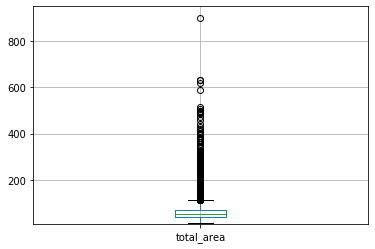

In [35]:
boxplot_custom_ylim('total_area',10,950)

Согласно данной диаграмме видно, что верхний "ус" (*+1.5 IQR*) заканчивается на площади ~ 110 m^2. Выше него идут выбросы, которые необходимо исключить из дальнейшей работы.

Определим более точно верхнюю границу. Для этого уменьшим масштаб до значений (50, 150)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4876dfcb10>, (0, 150))

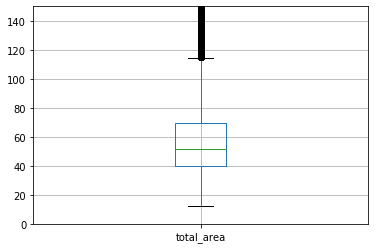

In [36]:
boxplot_custom_ylim('total_area',0,150)

Теперь более точно видно границу выбросов. Обозначим её в 115 m^2. 
Минимальная граница = 12 m^2

In [37]:
max_norm_total_area = 115
min_norm_total_area = 12

#### Цена

Проведём анализ разброса цены аналогично площади. 

In [38]:
estate_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Построим гисторграмму по данному параметру:

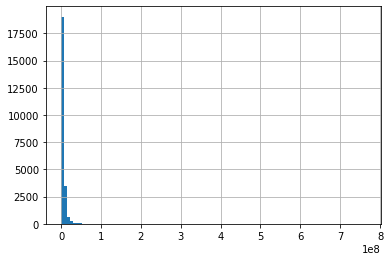

In [39]:
estate_data['last_price'].hist(bins = 100)


По данной гистограмме сложно оценить распределение значений, так как из-за выбросов гистограмма растянулась. Для большей наглядности обрежем график до 1е8 и увеличим количество параметра *bins*

(0, 100000000.0)

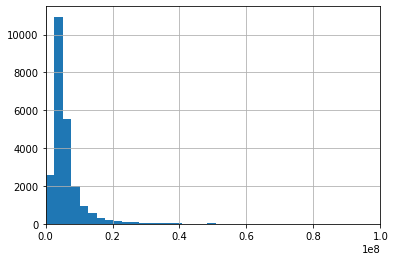

In [40]:
estate_data['last_price'].hist(bins = 300)
plt.xlim(0, 1e8)

После преобразований видно, что значения соответствуют *распределению Пуассона*. 

Медианное значение = 4 650 000, что отражает реальную картину по стоимости недвижимости. Определим, с какого момента начинаются выбросы. Для этого построим диаграмму выбросов по известным данным. Укажем границы в (1e4, 8e8)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f48767d7b50>, (0, 800000000.0))

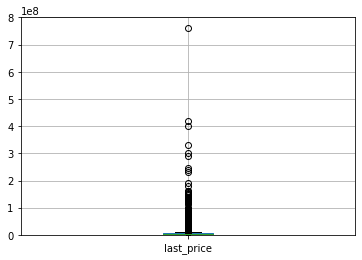

In [41]:
boxplot_custom_ylim('last_price',0,8e8)

К сожалению, по такой диаграмме сложно определить. Видно, что выбросы начинаются с сильно меньшей цены, поэтому уменьшим верхнюю границу до 1e8

(<matplotlib.axes._subplots.AxesSubplot at 0x7f487675ae50>, (0, 100000000.0))

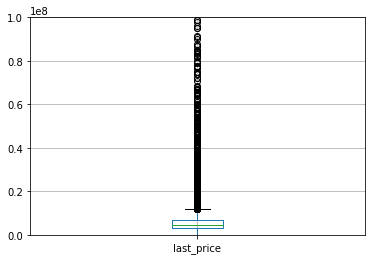

In [42]:
boxplot_custom_ylim('last_price',0, 1e8)

По данному разбросу видно, что максимальная граница примерно равна 0.1e8 или 1e7. После данных значений начинаются выбросы. 

Рассмотрим минмальную границу значений. Исходя из результатот, полученных методом *.describe* видно, что минимальное значение = 1.2e4. Посмотрим эту границу на диаграмме

(<matplotlib.axes._subplots.AxesSubplot at 0x7f48766e1210>, (0, 20000.0))

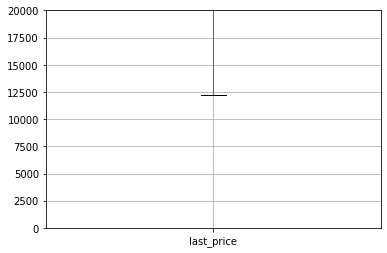

In [43]:
boxplot_custom_ylim('last_price',0, 2e4)

Отчётливо видно, что Q1 квартиль начинается со значения ~ 12500. Его и примем за минимально значение.

In [44]:
max_norm_price = 1e7
min_norm_price = 12500

#### Число комнат

In [45]:
estate_data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Посторим гистограмму, отображающую разброс данных.

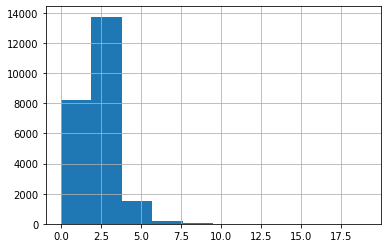

In [46]:
estate_data['rooms'].hist(bins = 10)

Мы наблюдаем *распределение Пуассона*. Построим диаграмму, для определения выбросов и нахождения границ нормальных значений.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f48765eebd0>, (0, 19))

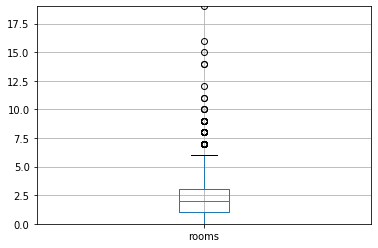

In [47]:
boxplot_custom_ylim('rooms',0, 19)


Наблюдются выбросы после значения 6 комнат. Примем это значение как максимум, однако Q1 у нас начинается с 0. Проверим количество квартира с 0 количеством комнат.

In [48]:
estate_data[estate_data['rooms'] == 0]['rooms'].count()

197

Согласно документации по заполнению XML запросов в Яндекс.Недвижимости, заполнение параметра 
*rooms* не производится для студий. В связи с этим, можно сделать предположение, что нулевое значение является корректным. 

(https://yandex.ru/support/realty/requirements/requirements-sale-housing.html)

In [49]:
max_norm_room = 6
min_norm_room = 0

#### Высота потолков

In [50]:
estate_data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

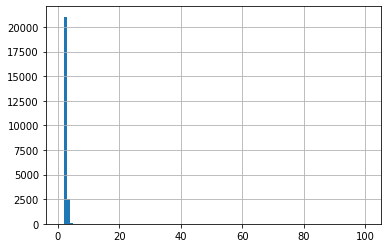

In [51]:
estate_data['ceiling_height'].hist(bins = 100)

Из описания видно, что максимальное значение равно 100 метрам, что очень далеко от правды. В результате, гистограмма очень сильно сместилась. Ограничим её 3 метрами

(0, 10)

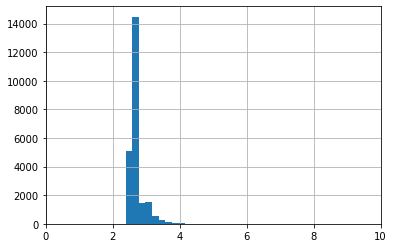

In [52]:
estate_data['ceiling_height'].hist(bins = 500)
plt.xlim(0, 10)

По откорректированной гистограмме более выражено *распределение Пуассона*.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4877447f10>, (2.2, 3))

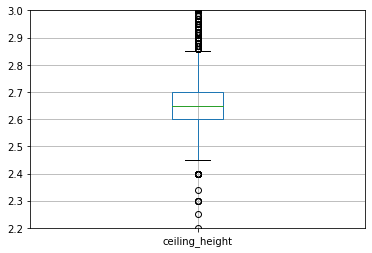

In [53]:
boxplot_custom_ylim('ceiling_height',2.2,3)


При анализе были выявлены выбросы как ниже нормы, так и выше. 

Обозначим границы нормальных значений:

In [54]:
max_norm_ceil = 2.85
min_norm_ceil = 2.45

По результатам анализа мы выявили нормальные значения для основных параметров. Создадим таблицу, в которой будут учтены все эти параметры и исключены выбросы. Назовём её *norm_estate_data*

In [55]:
norm_estate_data = estate_data.query('12 <=total_area <= 115'
                                      'and 12500 <= last_price <=1e7'
                                      'and 0 <= rooms <= 6 and 2.45'
                                      '<= ceiling_height <= 2.85').reset_index(drop=True)

norm_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19150 entries, 0 to 19149
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19150 non-null  int64         
 1   last_price            19150 non-null  int64         
 2   total_area            19150 non-null  float64       
 3   first_day_exposition  19150 non-null  datetime64[ns]
 4   rooms                 19150 non-null  int64         
 5   ceiling_height        19150 non-null  float64       
 6   floors_total          19150 non-null  int64         
 7   living_area           19150 non-null  float64       
 8   floor                 19150 non-null  int64         
 9   is_apartment          19150 non-null  object        
 10  studio                19150 non-null  bool          
 11  open_plan             19150 non-null  bool          
 12  kitchen_area          19150 non-null  float64       
 13  balcony         

По результатам анализа у нас осталось 19150 записей (81% от изначалнлього), скорректированных по требуемым параметрам. 


#### Проверка времени продажи квартиры

Время продажи квартиры у нас описано в столбце *days_exposition*. Изучим данный параметр при помощи функции *.describe*

In [56]:
estate_data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из полученного результата мы можем сделать вывод, что среднее значение равняется 169 дней, а медианное - 95 дней. 

Построим гистограмму данного параметра для осмотра распределения значений.

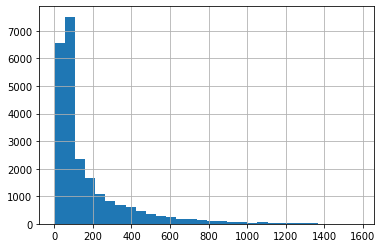

In [57]:
estate_data['days_exposition'].hist(bins = 30)

Полученная гистограмма отлично демонстрирует *распределение Пуассона*.

Построим диаграмму для оценки нормальных значений (без выбросов). 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4876060490>, (0, 1600))

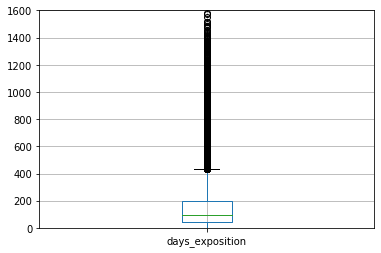

In [58]:
boxplot_custom_ylim("days_exposition",0,1600)

По данной диаграмме можно увидеть на каком промежутке значений у нас находятся "нормальные значения" и с каких значений у нас начинаются выбросы. 

Построим дополнительно две диаграммы, в которых при помощи мастштаба определим точные границы.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f48773f0d90>, (400, 500))

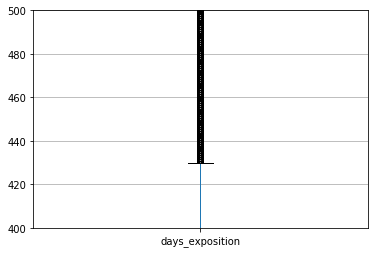

In [59]:
boxplot_custom_ylim("days_exposition",400,500)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4875f06390>, (0, 10))

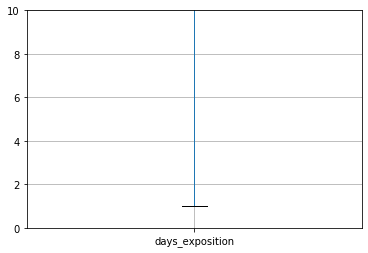

In [60]:
boxplot_custom_ylim("days_exposition",0,10)

Теперь точно можно сказать, что нормальные значения находятся в промежутке от 1 до 430 дней. 

Если продажа занимает менее 1 дня (в день публикации), то это является сверх-быстрой продажей.
Если продажа занимает более 430 дней, то продажа занимает необычно много времени. 

#### Оценка зависимости цены от факторов 

Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [61]:
norm_estate_data.corr()['last_price'].sort_values(ascending = False)

last_price             1.000000
total_area             0.648161
price_m2               0.616294
living_area            0.486841
kitchen_area           0.421563
rooms                  0.403558
floors_total           0.294610
ceiling_height         0.223514
parks_around3000       0.197028
floor                  0.192493
total_images           0.165682
balcony                0.096253
parks_nearest          0.064814
airports_nearest       0.049202
days_exposition        0.023625
ponds_nearest          0.018822
year                   0.013701
month                  0.004469
day                   -0.008129
ponds_around3000      -0.044996
open_plan             -0.049557
studio                -0.072970
live_to_total         -0.096848
cityCenters_nearest   -0.140291
kitchen_to_total      -0.163578
Name: last_price, dtype: float64

##### Квадратный метр

Ранее, мы добавляли к нашей таблице столбец с площадью квартиры (*price_m2*). Изучим зависимость *last_price* от площади при помощи метода *.corr* (*Коэффициент корреляции Пирсона*)

Ранее мы выяснили, что в исследуемых параметрах наблюдаются выбросы. Была создана таблица *norm_estate_data*, в которой были исключены не нормальные значения. Для отслеживания более точной корреляции будем использовать данную выборку.

In [62]:
estate_data['last_price'].corr(estate_data['price_m2'])

0.7364987705397439

In [63]:
norm_estate_data['last_price'].corr(norm_estate_data['price_m2'])

0.6162943595301594

Значение 0.73 соответствтует высокой зависимости цены от площади, однако при использовании "нормальных" значений корреляция не так сильно просматривается. Значения 0.61 соответствует "заметной корреляции"

##### Комнаты

Проверим коэффициенты на исходной и нормальной выборке:

In [64]:
estate_data['last_price'].corr(estate_data['rooms'])

0.36334284996489374

In [65]:
norm_estate_data['last_price'].corr(norm_estate_data['rooms'])

0.403557891161461

После нормализации значений мы можем отследить более яркую выраженную корреляцию.

##### Этаж (первый или последний)

Для следующего анализа нам потребуются значения из добавленного столбца *floors_group*. Согласно условию, нам потребуются только строки с значением *первый* и *последний*
Выберем такие значения и сохраним их в отдельной таблице *fst_lst_floor_data*

In [66]:
fst_lst_floor_data = norm_estate_data.query('floors_group == "Первый" or '
                                            'floors_group == "Последний"')


In [67]:
fst_lst_floor_data['last_price'].corr(fst_lst_floor_data['floor'])

0.19436925049273496

Полученная зависимость очень слабая. 

##### Расстояние до центра

Расстояние у нас находится в столбце *cityCenter_nearest*

In [68]:
norm_estate_data['last_price'].corr(norm_estate_data['cityCenters_nearest'])

-0.14029086839424854

По полученным данным корреляции между ценой квартиры и расстоянием до центра не выявлено.

##### Зависимость цены от  дня недели /  месяца / года 

In [69]:
estate_data['day'].corr(estate_data['last_price'])

0.0015501452176215518

Коэффициент Пирсона очень-очень мал, что означает об отсутствии какой-либо корреляции между днем недели и ценой.

In [70]:
estate_data['month'].corr(estate_data['last_price'])

0.0027791287507396983

Между месяцем и ценой тоже не наблюдается корреляции

In [71]:
estate_data['year'].corr(estate_data['last_price'])

-0.043089036199507054

In [72]:
corr_params = ['price_m2', 'rooms', 'cityCenters_nearest', 'day', 'month', 'year']

In [73]:
n = []
for param in corr_params:
    n.append(estate_data[param].corr(estate_data['last_price']))


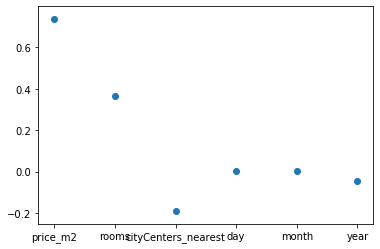

In [74]:
plt.scatter(x = corr_params, y = n)

Корреляции между годом продажи и ценой не наблюдается.

#### Выделить пункты с самой высокой и низкой стоимостью жилья

Выделим топ 10 населённых пунктов с наибольшим числом объявлений. Для этого будем использовать таблицу с нормальными значениями *norm_estate_data*. Сгруппируем по название населённых пунктов (*.groupby*), посчитаем количество таких значений по таблице (*.value_counts()*) и отсоритруем по убыванию для наглядности. 

In [75]:
top_10_locality = norm_estate_data['locality_name'].groupby(norm_estate_data['locality_name']).value_counts().sort_values(ascending = False).head(10)
top_10_locality

locality_name      locality_name    
санкт-петербург    санкт-петербург      11710
посёлок мурино     посёлок мурино         515
посёлок шушары     посёлок шушары         433
всеволожск         всеволожск             379
посёлок парголово  посёлок парголово      326
колпино            колпино                315
пушкин             пушкин                 297
деревня кудрово    деревня кудрово        295
гатчина            гатчина                283
выборг             выборг                 205
Name: locality_name, dtype: int64

С большим приемуществом в списке преобладают объявления из Санкт-Петербурга. Создадим отдельную таблицу, в которой останутся только значения из топ 10 населённых пунктов. Для этого создадим функцию *.check_top_10* для проверки значений.

In [76]:
def check_top_10(row):
    if row['locality_name'] in top_10_locality:
        return row

In [77]:
top_10 = norm_estate_data.apply(check_top_10, axis = 1).dropna().reset_index(drop=True)

Посчитаем среднюю цену квадратный метра жилья в населённых пунктах. Для этого создадим сводную таблицу с индексами, равными населённым пунктам и значениями, равными средней цене за квадратный метр. 

In [78]:
top_10.pivot_table(index = 'locality_name', values  = 'price_m2', aggfunc='mean').sort_values(by = 'price_m2', ascending = False)

,price_m2
locality_name,
санкт-петербург,103656.993083
пушкин,99556.060606
деревня кудрово,92472.128814
посёлок парголово,90331.840491
посёлок мурино,85737.431068
посёлок шушары,78632.625866
колпино,75407.168254
гатчина,68340.402827
всеволожск,66927.432718


В Питере наблюдается самая большая цена за квадратный метр. В Выборге же - самая низкая. 

#### Выснить, какая область входит в центр.

Для определения центральной зоны в Санкт-Петербурге выполним следующие действия:
    * Выделим квартиры в Санкт-Петербурге
    * Создадим столбец с расстоянием до центра в километрах (округлим до целых)
    * Посчитаем среднюю цену для каждого километра
    * Построим график, на котором изменение будет выражено сильным его изменением

##### Выделение квартир в Петербурге 

Создадим новую таблицу, в которой сохраним только строки, где 
```'locality_name' = 'санкт-петербург'```

In [79]:
spb_data = norm_estate_data.query('locality_name == "санкт-петербург"').reset_index(drop=True)
spb_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floors_group,live_to_total,kitchen_to_total
0,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558,92785,3,8,2015,Другой,0.612500,0.148214
1,5,7915000,71.6,2019-04-18,2,2.65,24,30.0,22,False,...,0,502,95,110544,3,4,2019,Другой,0.418994,0.263966
2,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,502,289,88524,6,2,2017,Другой,0.714754,0.106557
3,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553,137,127525,3,11,2017,Другой,0.512626,0.214646
4,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,1,296,19,119230,5,11,2017,Другой,0.525641,0.194872
5,6,4180000,36.0,2016-09-09,1,2.65,17,16.5,7,False,...,1,859,571,116111,4,9,2016,Другой,0.458333,0.305556
6,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,0,502,168,104838,4,1,2017,Другой,0.625806,0.180645
7,13,3200000,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,0,502,310,101265,2,3,2018,Другой,0.534810,0.180380
8,11,2950000,32.0,2016-10-29,1,2.60,9,17.7,9,False,...,1,190,615,92187,5,10,2016,Последний,0.553125,0.190625
9,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,3,124,265,66872,5,10,2015,Первый,0.478395,0.201646


##### Столбец с расстоянием до центра (в км)

Для преобразования используем lambda-функцию, в которой разделим метры на 1000 (для приведения в км) и сохраним, как целое число.

In [80]:
spb_data['to_center_km'] = spb_data['cityCenters_nearest'].apply(lambda x: int((x/1000)))
spb_data['to_center_km'].head(10)

0    13
1    11
2    15
3    13
4    14
5    14
6    10
7     9
8    14
9     2
Name: to_center_km, dtype: int64

##### Средняя цена для каждого километра

In [81]:
km_to_mean_price = spb_data.pivot_table(index = 'to_center_km', values = 'last_price', aggfunc = 'mean')

In [82]:
km_to_mean_price.sort_values(by = 'last_price',ascending = False)

,last_price
to_center_km,
0,7.353450e+06
1,7.334089e+06
2,6.914642e+06
4,6.857833e+06
5,6.727607e+06
3,6.397701e+06
6,6.236378e+06
7,6.088810e+06
20,6.004622e+06


##### График с сильными изменениями

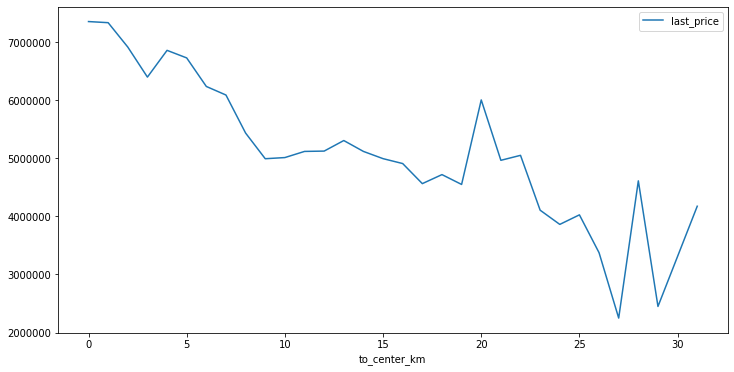

In [83]:
km_to_mean_price.plot(figsize = (12,6))

На графике видно, что падение значений наблюдается до ~ 8 км от центра. Определим, что квартиры в центре, это квартиры, расположенные в радиусе 8 км от центральной точки. Сохраним выборку с отдельной переменной - *center_spb_data*.

In [84]:
center_spb_data = spb_data.query('to_center_km <= 8').reset_index(drop = True)
center_spb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          1658 non-null   int64         
 1   last_price            1658 non-null   int64         
 2   total_area            1658 non-null   float64       
 3   first_day_exposition  1658 non-null   datetime64[ns]
 4   rooms                 1658 non-null   int64         
 5   ceiling_height        1658 non-null   float64       
 6   floors_total          1658 non-null   int64         
 7   living_area           1658 non-null   float64       
 8   floor                 1658 non-null   int64         
 9   is_apartment          1658 non-null   object        
 10  studio                1658 non-null   bool          
 11  open_plan             1658 non-null   bool          
 12  kitchen_area          1658 non-null   float64       
 13  balcony           

У нас получилось 1658 записей в центре города. 

### Выделить сегмент квартир в центре (аналогично пунктам 4.1, 4.4). Сравнить с выводами по всему городу

Проанализируем эту территорию и изучите следующие параметры:
площадь, 
цена, 
число комнат, 
высота потолков. 

Также выделите факторы, 
которые влияют на стоимость квартиры 
    (число комнат, 
    этаж, 
    удалённость от центра, 
    дата размещения объявления). 

In [85]:
params = ['total_area','last_price','rooms', 'ceiling_height']
factors = ['rooms','floor','to_center_km','day','month','year']

In [86]:
print(center_spb_data[params].describe())
print()
print(spb_data[params].describe())

        total_area    last_price        rooms  ceiling_height
count  1658.000000  1.658000e+03  1658.000000     1658.000000
mean     56.170127  6.317222e+06     1.985525        2.652201
std      18.764097  1.893520e+06     0.886992        0.080173
min      12.000000  1.686000e+06     0.000000        2.450000
25%      42.500000  4.800000e+06     1.000000        2.650000
50%      53.950000  6.225000e+06     2.000000        2.650000
75%      68.075000  7.800000e+06     3.000000        2.650000
max     115.000000  1.000000e+07     6.000000        2.850000

         total_area    last_price         rooms  ceiling_height
count  11710.000000  1.171000e+04  11710.000000    11710.000000
mean      51.354103  5.219474e+06      1.878138        2.629240
std       16.480954  1.691587e+06      0.878623        0.083036
min       12.000000  1.190000e+06      0.000000        2.450000
25%       39.000000  3.950000e+06      1.000000        2.560000
50%       47.300000  4.850000e+06      2.000000        2.

По описанию, полученному выше, можно определить следующие отличия:
    * Площадь квартир в центре выше чем по городу (53 vs 47 по медианным значениям)
    * Цены квартир выше в центре более чем на 1 млн.
    * Количество комнат примерно одинаковое
    * Высота потолков по всему городу одинакова (2.65 м)

Сравним факторы, влияющие на цены квартир. Для этого мы сохранили эти параметры в отдельную переменную - *factors*

In [87]:
for factor in factors:
    print('Factor is {}\n'.format(factor))
    print('For all Spb {}'.format(spb_data[factor].corr(spb_data['last_price'])))
    print('For center Spb {}\n'.format(center_spb_data[factor].corr(center_spb_data['last_price'])))

Factor is rooms

For all Spb 0.4887026237245862
For center Spb 0.44278870820675337

Factor is floor

For all Spb 0.11253692545053133
For center Spb 0.11540833082037366

Factor is to_center_km

For all Spb -0.24896408971982897
For center Spb -0.26897498229329114

Factor is day

For all Spb -0.0003503602857487167
For center Spb 0.030349775049948836

Factor is month

For all Spb -0.012458336523501307
For center Spb 0.008588476986269225

Factor is year

For all Spb 0.04243860106709558
For center Spb -0.03399051013738919



##### Вывод

Факторы, влияющие на цену квартиры не изменяются взависимости от центра / всего города.

## Шаг 5. Общий вывод

Исходя из проведённого анализа мы можем сделать следующие выводы:

* Основной причиной появления пропусков может быть отказ от заполнения собственником, так как поле могло быть не обязательным. 
* Причиной появления пропусков в дате может быть сбой системы логирования, так как эту информацию не мог заполнить собственник, а ручное заполнение параметров слишком трудозатратное
* Дубликатов значений не наблюдается.
* При добавлении дополнительных столбцов большинство из параметров было определено вычислением отношения одного столбца к другому. При разделении дат дни недели были обозначены цифрами.
* Были изучены следующие параметры: площадь, цена, число комнат, высота потолков. В результате изучения была создана новая таблица *norm_estate_data*, в которой были сохранены значения, не выходящие за рамки нормального распределения (отсечены выбросы)
* В случае, если продажа квартиры занимает менее одного дня - это сверх-быстрая продажа. Если продажа занимает более 430 дней - продажа занимает очень много времени. Вероятно, потребуется изменить объявление.
* При проверке зависимости было определно, что:
    * Основными факторами, влияющими на цену квартиры являются цена за метр квадратный и кол-во комнат
    * Расстояние до центра не сильно влияет на цену
    * Дата продажи не влияет на итоговую цену
* Самая высокая средняя цена за квадратный метор наблюдается в Санкт-Петербурге и равняется 103657 руб. Самая низкая цена - в Выборге. Она равняется 57680 руб.
* Согласно графику, в центральный округ Санкт-Петербурга входят квартиры в радиусе 8 км. 
* При сравнении значений параметров квартир и факторов, влияющих на цену по всему Петербургу и в центре, было установлено, что:
    * Площадь квартир в центре выше, что может быть обусловлено большим количеством старых квартир
    * Цена в центре выше. Разница - около 1 млн рублей
    * Количество комнат и высота потолков сильно не отличается.
    * Факторы, влияющие на цены - не меняются.